In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/support2.csv')

In [3]:
df.head()

,Unnamed: 0,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.849976,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
1,2,60.338989,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
2,3,52.746979,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
3,4,42.384979,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
4,5,79.884949,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [4]:
df.shape

(9105, 48)

In [5]:
df.isna().sum()

Unnamed: 0       0
age              0
death            0
sex              0
hospdead         0
slos             0
d.time           0
dzgroup          0
dzclass          0
num.co           0
edu           1634
income        2982
scoma            1
charges        172
totcst         888
totmcst       3475
avtisst         82
race            42
sps              1
aps              1
surv2m           1
surv6m           1
hday             0
diabetes         0
dementia         0
ca               0
prg2m         1649
prg6m         1633
dnr             30
dnrday          30
meanbp           1
wblc           212
hrt              1
resp             1
temp             1
pafi          2325
alb           3372
bili          2601
crea            67
sod              1
ph            2284
glucose       4500
bun           4352
urine         4862
adlp          5641
adls          2867
sfdm2         1400
adlsc            0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9105 non-null   int64  
 1   age         9105 non-null   float64
 2   death       9105 non-null   int64  
 3   sex         9105 non-null   object 
 4   hospdead    9105 non-null   int64  
 5   slos        9105 non-null   int64  
 6   d.time      9105 non-null   int64  
 7   dzgroup     9105 non-null   object 
 8   dzclass     9105 non-null   object 
 9   num.co      9105 non-null   int64  
 10  edu         7471 non-null   float64
 11  income      6123 non-null   object 
 12  scoma       9104 non-null   float64
 13  charges     8933 non-null   float64
 14  totcst      8217 non-null   float64
 15  totmcst     5630 non-null   float64
 16  avtisst     9023 non-null   float64
 17  race        9063 non-null   object 
 18  sps         9104 non-null   float64
 19  aps         9104 non-null  

In [9]:
df.nunique()

Unnamed: 0    9105
age           7323
death            2
sex              2
hospdead         2
slos           167
d.time        1724
dzgroup          8
dzclass          4
num.co          10
edu             31
income           4
scoma           11
charges       8501
totcst        8197
totmcst       5516
avtisst        352
race             5
sps            604
aps            125
surv2m         949
surv6m         936
hday            85
diabetes         2
dementia         2
ca               3
prg2m           51
prg6m           88
dnr              3
dnrday         177
meanbp         164
wblc           499
hrt            186
resp            66
temp            98
pafi          1457
alb             60
bili           295
crea           130
sod             60
ph              77
glucose        439
bun            159
urine         1494
adlp             8
adls             8
sfdm2            5
adlsc         1735
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,4553.000000,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,2628.531434,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,1.000000,18.041992,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2277.000000,52.796997,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,4553.000000,64.856995,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,6829.000000,73.998962,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,9105.000000,101.847961,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


## Exploratory Data Analysis

#### 1. Demographic Analysis
##### - What is the age distribution of the patients? Are there particular age ranges that are more common? 
##### - How does gender distribution differ across various age groups? Are certain age groups more male or female-dominated? 
##### - What are the racial demographics of the patients, and how do these vary by age, gender and income? 
##### - How does the income distribution vary by age and gender? Is there a pattern for different demographics? 

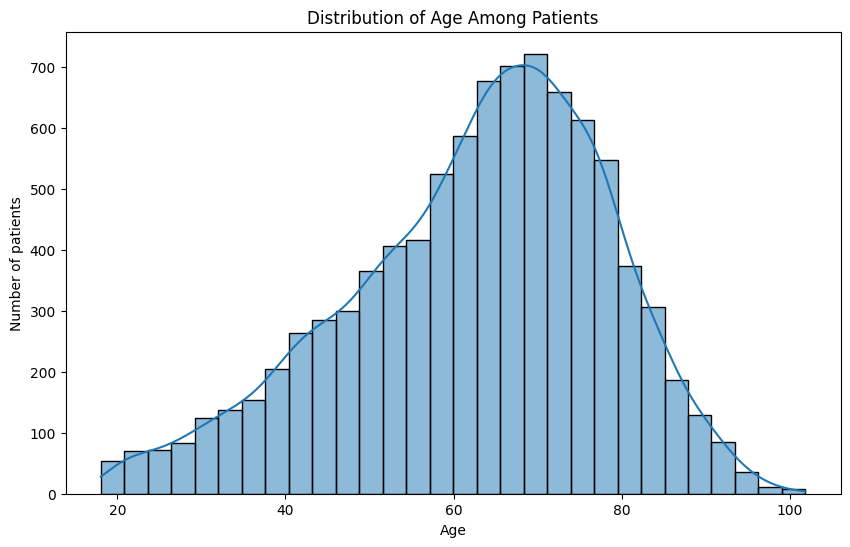

In [12]:
# 1. distribution of age among patients 

plt.figure(figsize = (10,6))
sns.histplot(df['age'], bins = 30, kde = True)
plt.title('Distribution of Age Among Patients')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.show()

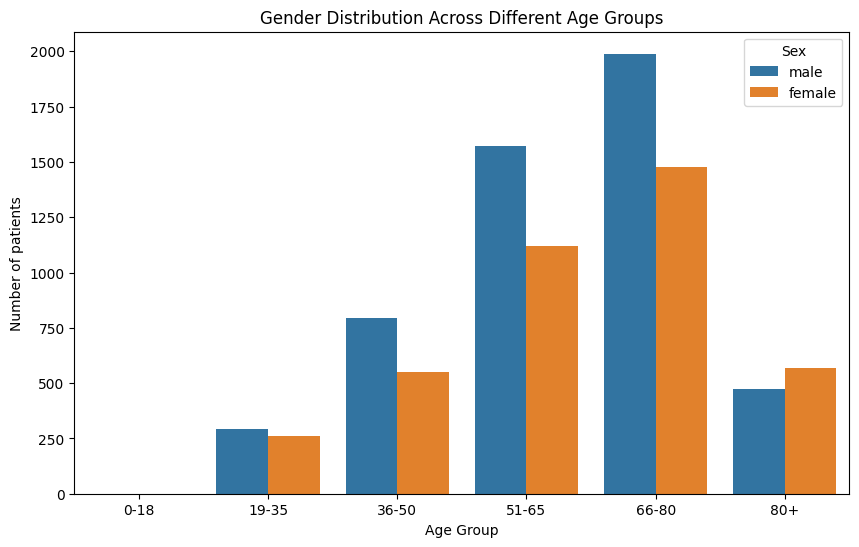

In [14]:
# 2. Gender distribution across different age groups 

# creating an age group column for analysis
df['AgeGroup'] = pd.cut(df['age'], bins = [0, 18, 35, 50, 65, 80, 100], labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '80+'])

# plotting gender distribution across different age groups 
plt.figure(figsize = (10,6))
sns.countplot(x='AgeGroup', hue='sex', data=df)
plt.title('Gender Distribution Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of patients')
plt.legend(title = 'Sex')
plt.show()

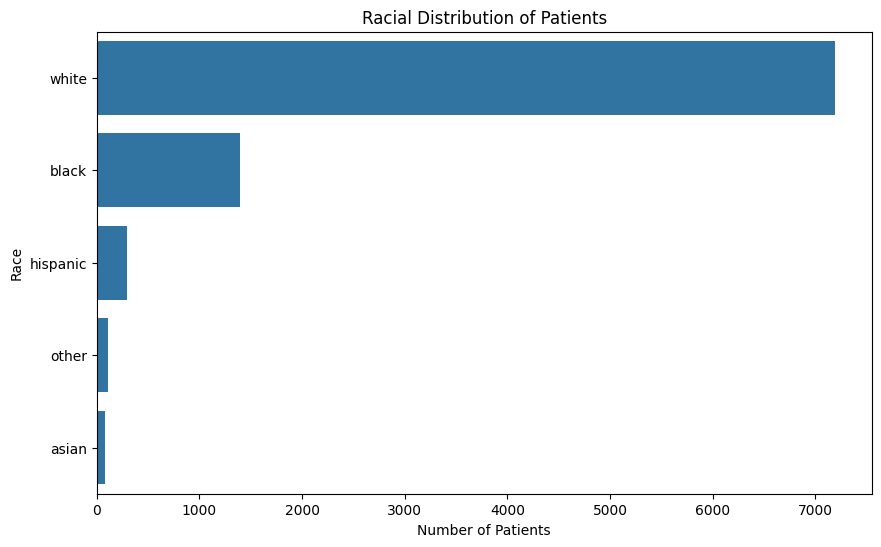

In [15]:
# 3. Racial Distribution of patients 

plt.figure(figsize=(10,6))
sns.countplot(y = 'race', data=df, order=df['race'].value_counts().index)
plt.title('Racial Distribution of Patients')
plt.xlabel('Number of Patients')
plt.ylabel('Race')
plt.show()

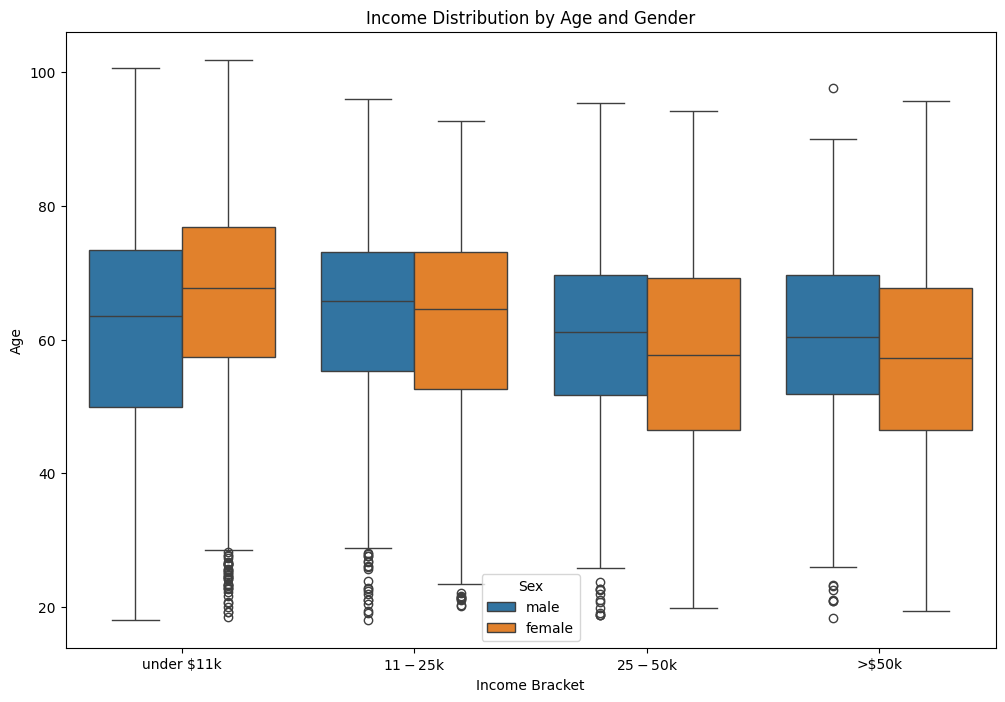

In [16]:
# 4. Income distribution by age and gender 

plt.figure(figsize = (12,8))
sns.boxplot(x = 'income', y='age', hue='sex', data=df, order = ['under $11k', '$11-$25k', '$25-$50k', '>$50k'])
plt.title('Income Distribution by Age and Gender')
plt.xlabel('Income Bracket')
plt.ylabel('Age')
plt.legend(title = 'Sex')
plt.show()

#### Disease and Comorbidities Analysis: 

In [17]:
# impute missing values for edu 

median_edu = df['edu'].median()

df['edu'].fillna(median_edu, inplace=True)

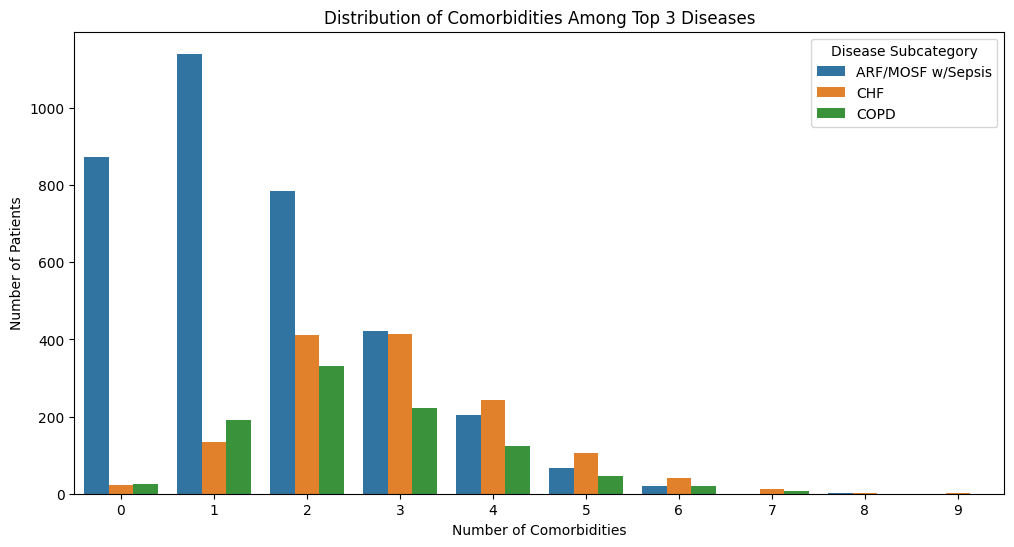

In [18]:
# 1. how does most common number of comorbidities vary with most common disease subcategory and how socioeconomic factors like income and education might influence this

#identify the 3 most common disease subcategories
top_diseases = df['dzgroup'].value_counts().nlargest(3).index
top_diseases_data = df[df['dzgroup'].isin(top_diseases)]

# analyzing number of comorbidities for top 3 diseases 
cb_disease = top_diseases_data.groupby(['dzgroup', 'num.co']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.barplot(x='num.co', y='Count', hue = 'dzgroup', data=cb_disease)
plt.title('Distribution of Comorbidities Among Top 3 Diseases')
plt.xlabel('Number of Comorbidities')
plt.ylabel('Number of Patients')
plt.legend(title='Disease Subcategory')
plt.show()

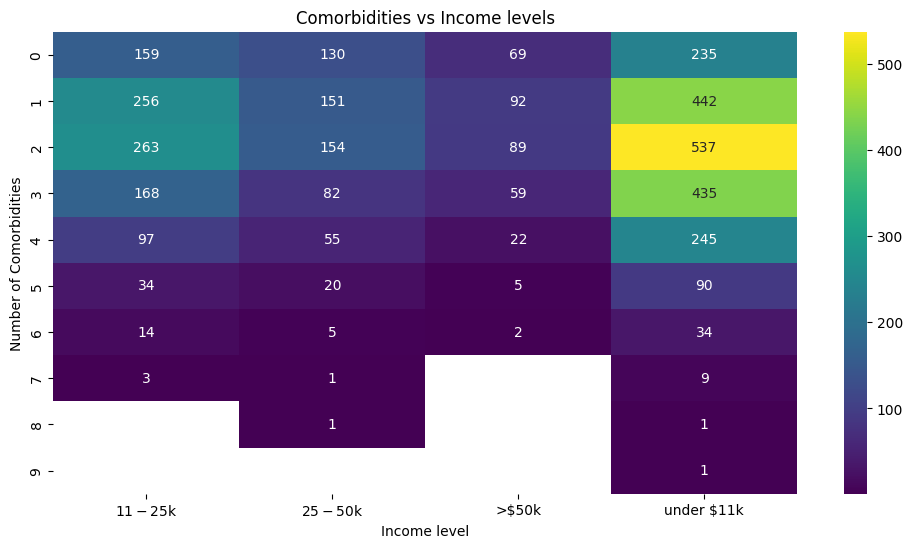

In [22]:
# analyzing relationship between income levels and comorbidities 
cb_income = top_diseases_data.groupby(['num.co', 'income']).size().reset_index(name = 'Count')

# plot relationshup between comorbidities and income 
plt.figure(figsize=(12,6))
sns.heatmap(cb_income.pivot(index = 'num.co', columns = 'income', values = 'Count'), annot=True, fmt='g', cmap='viridis')
plt.title('Comorbidities vs Income levels')
plt.xlabel('Income level')
plt.ylabel('Number of Comorbidities')
plt.show()

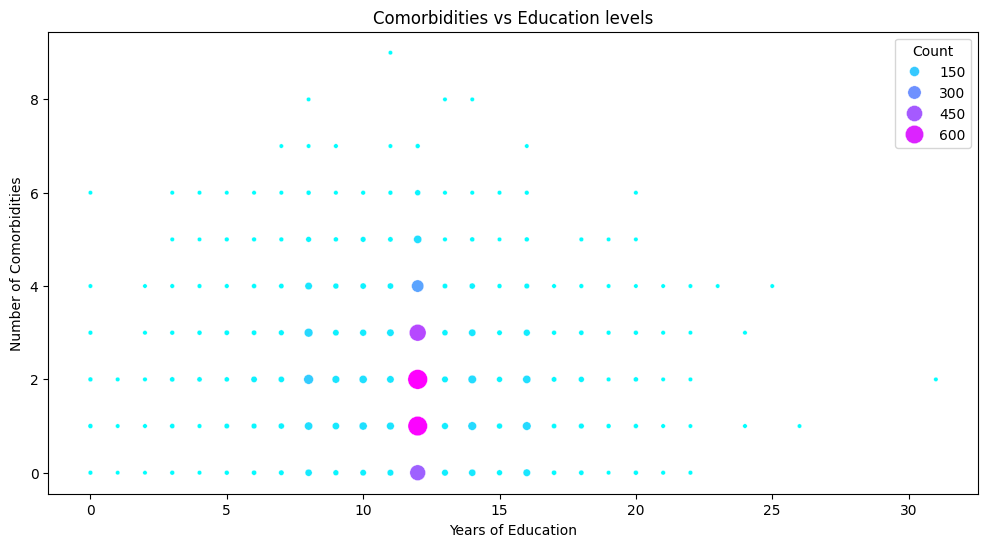

In [24]:
# analyzing relationship between comorbidities and education levels 

cb_education = top_diseases_data.groupby(['num.co', 'edu']).size().reset_index(name = 'Count')

# plotting relationship between comorbidities and education levels 
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'edu', y='num.co', size = 'Count', hue = 'Count', data=cb_education, sizes = (10,200), palette='cool')
plt.title('Comorbidities vs Education levels')
plt.xlabel('Years of Education')
plt.ylabel('Number of Comorbidities')
plt.show()

##### Examining how survival estimates (both predicted and physician's estimates) and functional status vary for patients with common diseases and varying number of comorbidities. This analysis helps understand the interplay between disease type, comorbidity burden, and both predicted and perceived chances of survival, as well as actual functional status

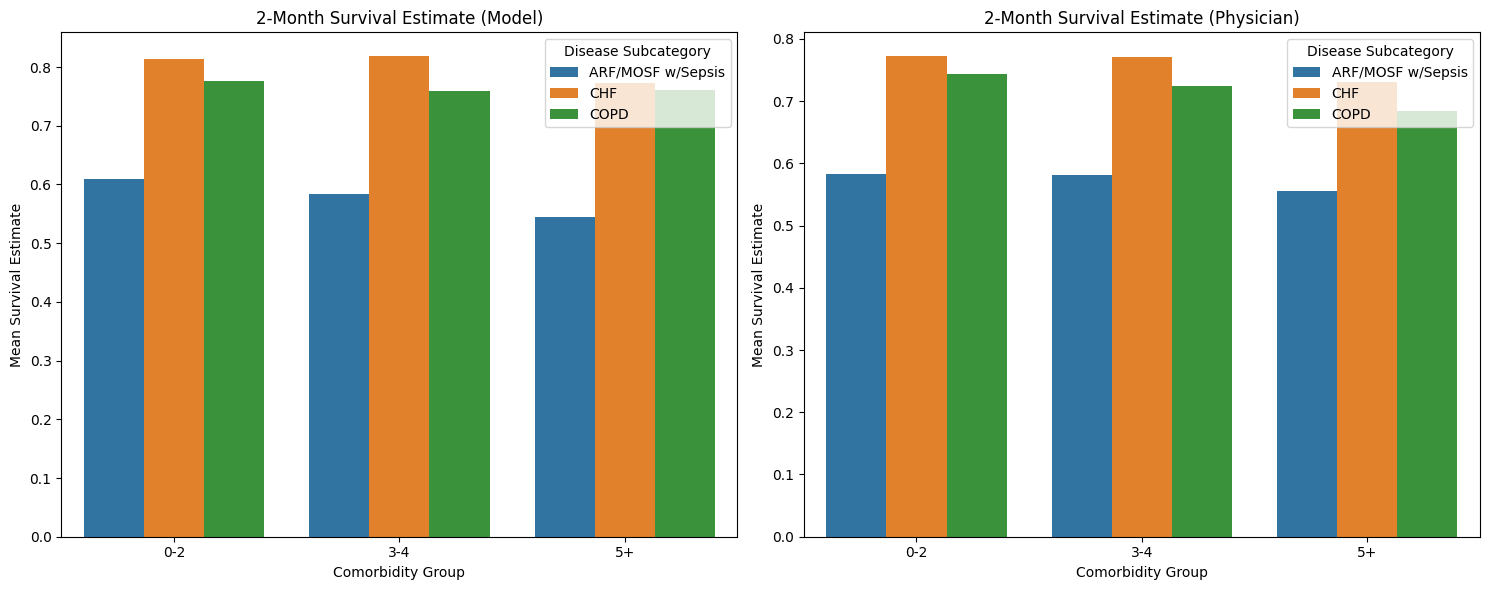

In [26]:
# categorizing comorbidities into groups (0-2, 3-4, 5+)
top_diseases_data['ComorbidityGroup'] = pd.cut(top_diseases_data['num.co'], bins = [0, 2, 4, float('inf')], labels = ['0-2', '3-4', '5+'])

survival_analysis = top_diseases_data.groupby(['dzgroup', 'ComorbidityGroup']).agg(
    mean_surv2m = ('surv2m', 'mean'),
    mean_prg2m = ('prg2m', 'mean'),
    mean_adlp = ('adlp', 'mean'),
    mean_adls = ('adls', 'mean')
).reset_index()

fig, axes = plt.subplots(1, 2, figsize = (15,6))

sns.barplot(x = 'ComorbidityGroup', y = 'mean_surv2m', hue = 'dzgroup', data=survival_analysis, ax=axes[0])
sns.barplot(x = 'ComorbidityGroup', y = 'mean_prg2m', hue = 'dzgroup', data=survival_analysis, ax=axes[1])

axes[0].set_title('2-Month Survival Estimate (Model)')
axes[0].set_xlabel('Comorbidity Group')
axes[0].set_ylabel('Mean Survival Estimate')

axes[1].set_title('2-Month Survival Estimate (Physician)')
axes[1].set_xlabel('Comorbidity Group')
axes[1].set_ylabel('Mean Survival Estimate')

axes[0].legend(title = 'Disease Subcategory')
axes[1].legend(title = 'Disease Subcategory')

plt.tight_layout()
plt.show()


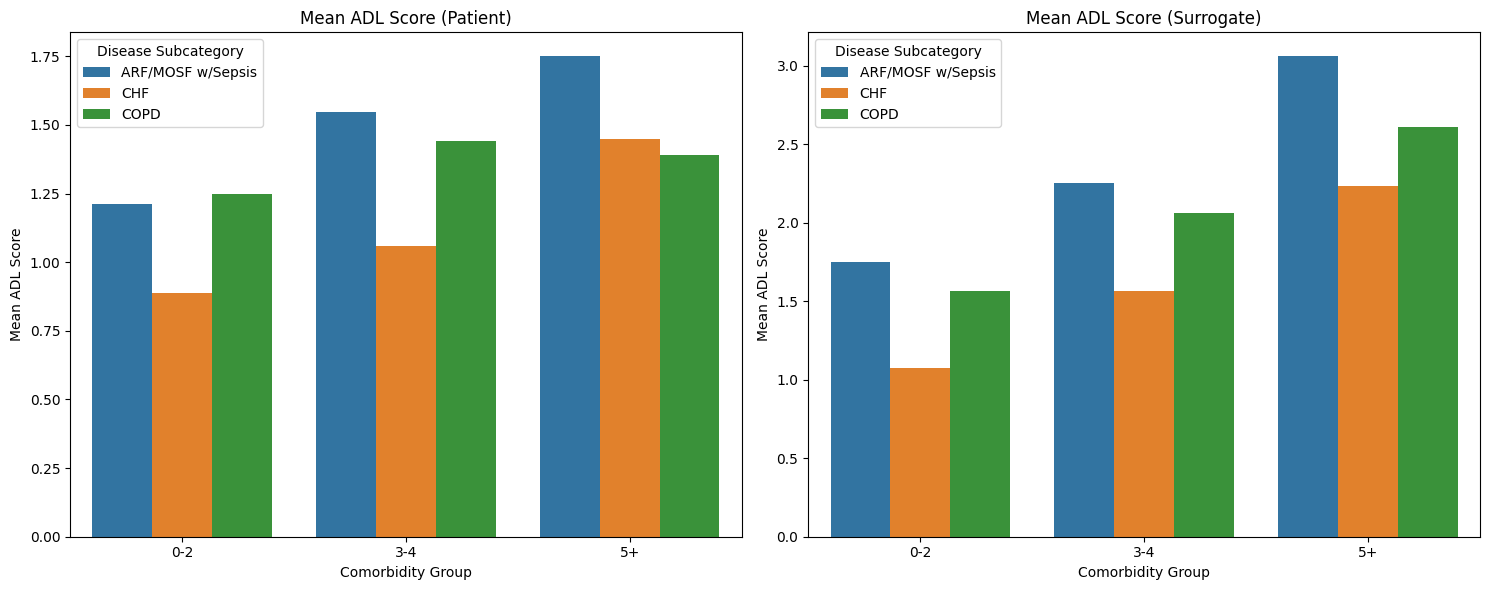

In [27]:
# plotting functionality scores 

fig, axes = plt.subplots(1, 2, figsize = (15,6))

sns.barplot(x = 'ComorbidityGroup', y = 'mean_adlp', hue = 'dzgroup', data=survival_analysis, ax=axes[0])
sns.barplot(x = 'ComorbidityGroup', y = 'mean_adls', hue = 'dzgroup', data=survival_analysis, ax=axes[1])

axes[0].set_title('Mean ADL Score (Patient)')
axes[0].set_xlabel('Comorbidity Group')
axes[0].set_ylabel('Mean ADL Score')

axes[1].set_title('Mean ADL Score (Surrogate)')
axes[1].set_xlabel('Comorbidity Group')
axes[1].set_ylabel('Mean ADL Score')

axes[0].legend(title = 'Disease Subcategory')
axes[1].legend(title = 'Disease Subcategory')

plt.tight_layout()
plt.show()